For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_cat
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [4]:
print(data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
data.shape

(150, 6)

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Encoding the 'Species' column i.e our targtet using LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Species_cat"] = lb_make.fit_transform(data["Species"])

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_cat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


# Spliting the dataset

In [10]:
target = data['Species_cat']

In [13]:
new_data = data.drop(['Species','Species_cat','Id'],axis = 1)

In [14]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Species_cat, dtype: int32

In [15]:
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (105, 4)
x_test  (45, 4)
y_train  (105,)
y_test  (45,)


**Applying Decision tree using Entropy**

In [17]:
#Building a decision tree model using 'gini' solver and splitter 'best'
from sklearn.tree import DecisionTreeClassifier
clf_DT1=DecisionTreeClassifier(criterion='entropy')
#fitting th 
clf_DT1.fit(x_train,y_train)
y_pred_DT1=clf_DT1.predict(x_test)

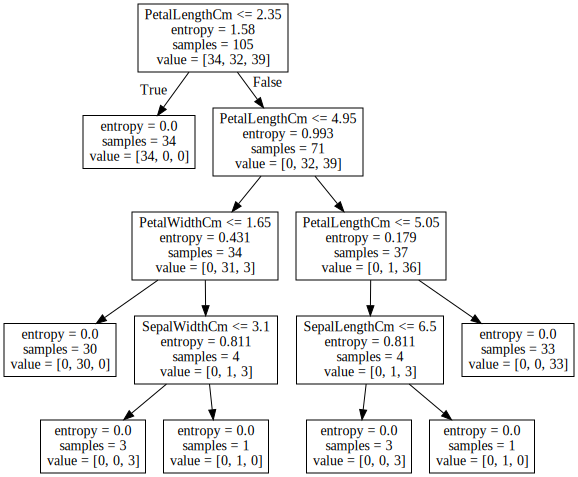

In [23]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
graph=Source(tree.export_graphviz(clf_DT1,feature_names=x_train.columns))
SVG(graph.pipe(format='svg'))

**Accuracy**

In [19]:
metrics.accuracy_score(y_test,y_pred_DT1)

0.9777777777777777

In [28]:
prediction=clf_DT1.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predection':prediction})

,Actual,Predection
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


**Prediction**

In [32]:
clf_DT1.predict([[6.5,3.0,5.2,2.0]])

array([2])